# 2HDM-I

## Higgs couplings with fermions
In the context of 2HDM-I, the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ can be extracted of:

$$g_{hff} = \frac{g}{2}\frac{m_{f}}{m_{W}}\frac{\cos{\alpha}}{\sin{\beta}}$$

where $f$ represents fermions, $m_f$ and $m_W$ are the masses of $f$ and $W$ respectively, $\alpha$ and $\beta$ are the mixing angles of 2HDM-I and finally $g$ is the $SU(2)$ coupling constant. In the case of $W$ and $Z$ Higgs couplings we have the next expressions:

$$g_{hVV} = g_V m_{V}\sin{(\beta-\alpha)}$$
where $m_V$ with $V = Z, W$. If we consider $C_{\alpha \beta} = \cos{(\beta-\alpha)}$

$$\alpha = \arctan{(\tan{(\beta)})}- \arccos{(C_{\alpha \beta})}$$
$$\sin{(\beta)} = \tan{(\beta)}\cos{(\arctan{(\tan{(\beta)})})}$$
then, $g_{hff}$ and $g_{hVV}$ are rewritten in term of $t_{\beta} = \tan{(\beta)}$ and $C_{\alpha \beta}$.

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

In [9]:
import sympy as sp #import sympy
sp.init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spacemathpy import *

### Python definition of $g_{hff}$

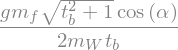

In [10]:
def ghff(mf,α,tb):
    global mW,g
    if issymbolic(mf,α,tb):
        MW= mW['symbol']
        return (g['symbol']/2)*(mf/MW)*(sp.cos(α)/(tb*sp.cos(sp.atan(tb))))
    else:
        MW= mW['value']
        return (g['value']/2)*(mf/MW)*(np.cos(α)/(tb*np.cos(np.arctan(tb))))

mf,a,tb,cab = sp.symbols(r'm_f,\alpha,t_b,{{C_{\alpha\beta}}}',real=True)
ghff(mf,a,tb)

### Python definition of $t$, $b$ and $\tau$ Higgs couplings

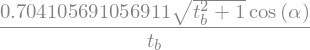

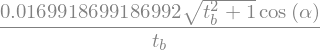

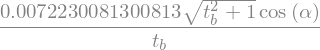

In [11]:
#2HDM-I

def ghtt_2hdmI(α,tb):
    if issymbolic(α,tb):
        mtop= mt['symbol']
    else:
        mtop= mt['value']
    return ghff(mtop,α,tb)
display(ghtt_2hdmI(a,tb).subs(numeric_substitutions('All')))

def ghbb_2hdmI(α,tb):
    if issymbolic(α,tb):
        mbot= mb['symbol']
    else:
        mbot= mb['value']
    return ghff(mbot,α,tb)
display(ghbb_2hdmI(a,tb).subs(numeric_substitutions('All')))
    
def ghtautau_2hdmI(α,tb):
    if issymbolic(α,tb):
        mtau= mta['symbol']
    else:
        mtau= mta['value']
    return ghff(mtau,α,tb)
display(ghtautau_2hdmI(a,tb).subs(numeric_substitutions('All')))

### Python definition of $W$ and $Z$ Higgs couplings

In [12]:
def ghww_2hdmI(sab):
    global mW,g
    if issymbolic(sab):
        MW,ggw= mW['symbol'],gw['symbol']
    else:
        MW,ggw= mW['value'],gw['value']
    return ggw*MW*sab
     
        
def ghzz_2hdmI(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,ggz= mZ['symbol'],gz['symbol']
    else:
        MZ,ggz= mZ['value'],gz['value']
    return ggz*MZ*sab

## Initial parameter space

In [13]:
n = 1000000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,50.0,n)
parameters = {'Cab':Cab,'tb':tb}

In [14]:
THDMI = HiggsSignalStrength()
THDMI.model = '2HDM-I'
THDMI.ghtt = ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb)
THDMI.ghbb = ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb)
THDMI.ghtautau = ghtautau_2hdmI(-np.arccos(Cab) + np.arctan(tb),
                               tb)
THDMI.ghWW = ghww_2hdmI(np.sqrt(1-Cab**2))
THDMI.ghZZ = ghzz_2hdmI(np.sqrt(1-Cab**2))
#THDMI.gCH = 0.5
#THDMI.mCH = np.random.uniform(100,1000,n)

In [15]:
THDMIspace1 = THDMI.parameter_space(parameters,sigma=1)
THDMIspace2 = THDMI.parameter_space(parameters,sigma=2)

## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [16]:
THDMIspace1.keys()

dict_keys(['Rtau', 'Rb', 'Rgamma', 'Rw', 'Rz', 'Intersection'])

In [17]:
THDMIspace1['Rtau'];

In [18]:
latex_names = {'Cab':r'$\cos(\beta -\alpha)$','tb':r'$\tan(\beta)$'}

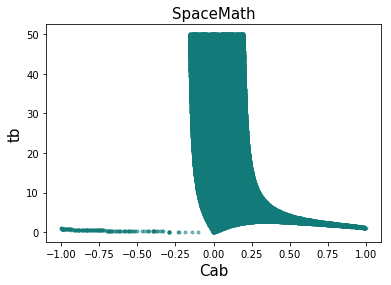

In [19]:
plot_df(THDMIspace1['Rtau'],
        colx='Cab',
        coly='tb',
        #fname='rtau_space.png'
       )

### $$R_{b}$$

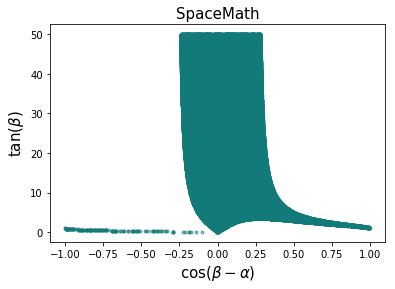

In [21]:
plot_df(THDMIspace1['Rb'],colx='Cab',coly='tb',latex_names=latex_names)

### $$R_{\gamma}$$

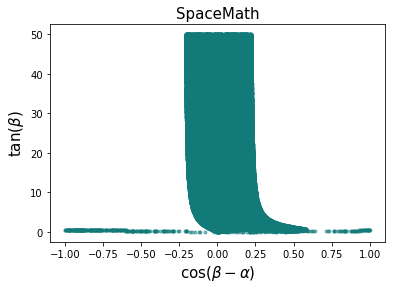

In [22]:
plot_df(THDMIspace2['Rgamma'],colx='Cab',coly='tb',latex_names=latex_names)

In [23]:
Rgamma.func(ghtt_2hdmI(0.1,0.2),
            ghbb_2hdmI(0.1,0.2),ghww_2hdmI(0.1),
            0,500)

### $$R_{W}$$

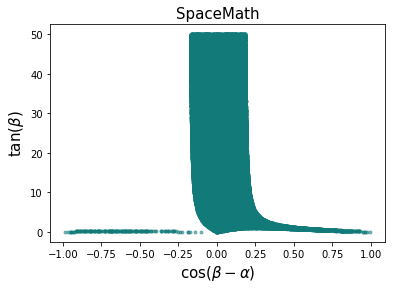

In [24]:
plot_df(THDMIspace1['Rw'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{Z}$$

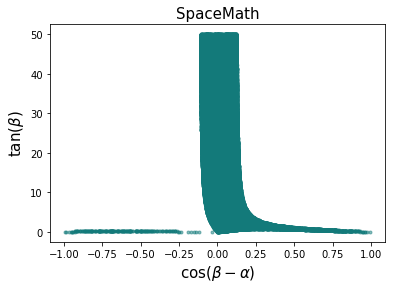

In [25]:
plot_df(THDMIspace2['Rz'],colx='Cab',coly='tb',
        latex_names=latex_names)

## Intersection

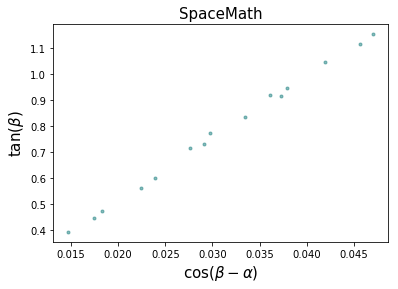

In [26]:
plot_df(THDMIspace1['Intersection'],colx='Cab',coly='tb',
        latex_names=latex_names)

## All Rxs
Using directly matplotlib

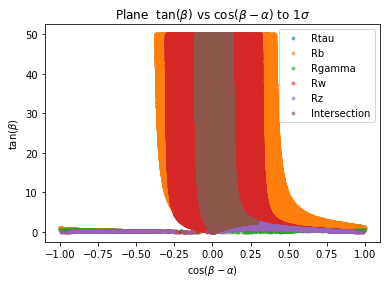

In [28]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rw','Rz','Rgamma']
data2s = {signal:THDMIspace2[signal] for signal in signals}
plt.figure()
for k in data2s.keys():
    plt.plot(data2s[k]['Cab'],data2s[k]['tb'],'.',label=k,alpha=0.5)
plt.xlabel(r'$\cos(\beta-\alpha)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
plt.legend();

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

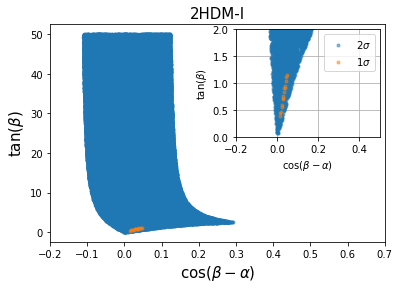

In [30]:
sigmaspace = {r'2$\sigma$':THDMIspace2,r'1$\sigma$':THDMIspace1}
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=0.7,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-I',fontsize=15)
ax.legend();


# Create inset of width 2 inches and height 1.5 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=2,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
axins.legend();
#path = ''
#plt.savefig(path + 'name.pdf')
#plt.show()